# Lead Scoring Case Study

### Importing Utilities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import plotly
from plotly import tools
import plotly.express as px
#sns.set_style("darkgrid", {"grid.color": ".2", "grid.linestyle": ":"})
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
import warnings
warnings.filterwarnings('ignore')

### Reading dataset

In [3]:
#reading data
url = 'https://drive.google.com/file/d/1n-107UynXUGP06442N_i7QKMNHetqdav/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.shape

(9240, 37)

In [6]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#statistical summary of all the numerical variables
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning and Initial Preperation

In [9]:
#Check for duplicate values
df.duplicated().any()

False



> There are no duplicate values in data.



In [10]:
#replacing 'Select' with NaN
df.replace({'Select': np.nan}, inplace = True)

In [11]:
#checking missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


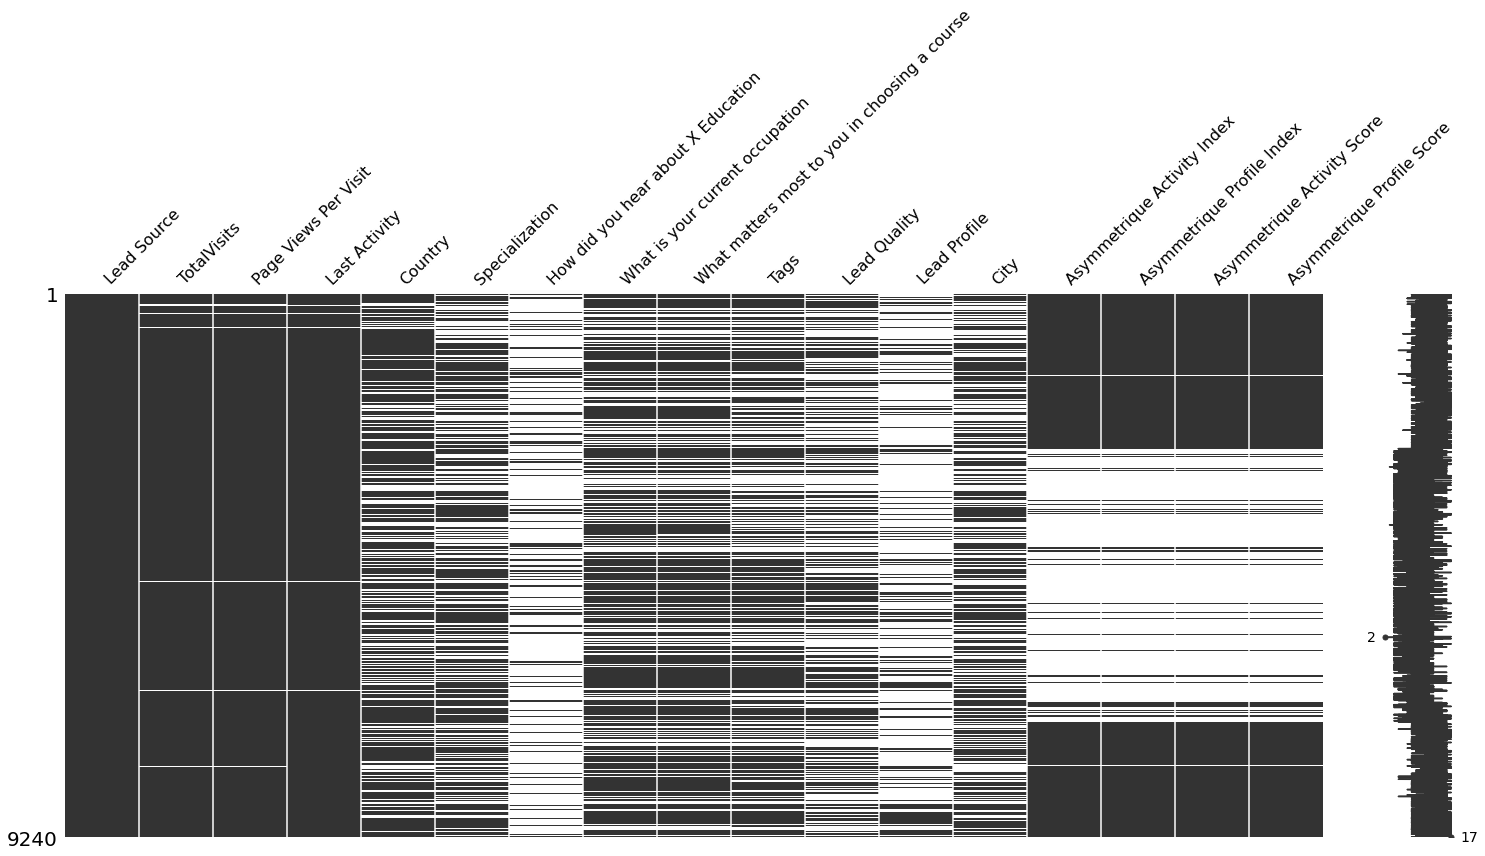

In [12]:
#visualizing columns with missing values
missing_col = [col for col in df.columns if df[col].isna().any()]
mno.matrix(df[missing_col], color = '0.2')

In [13]:
#dropping columns with more than 35% missing values
missing_cols = [col for col in df.columns if (df[col].isna().sum()/df.shape[0]*100) > 40]
df.drop(missing_cols, axis = 1, inplace = True)

In [14]:
x = (df.isna().sum()/df.shape[0]*100)
x[x > 0].sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

Let's look at all the columns with missing values.

In [15]:
#list of columns to be dropped
#Adding 'Prospect ID' and 'Lead Number' to this list as these are id columns and of any use to analysis
cols_to_drop = ['Prospect ID', 'Lead Number']

In [16]:
#levels in City
df['City'].value_counts(dropna = False, normalize = True).mul(100).round(2)

NaN                            39.71
Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

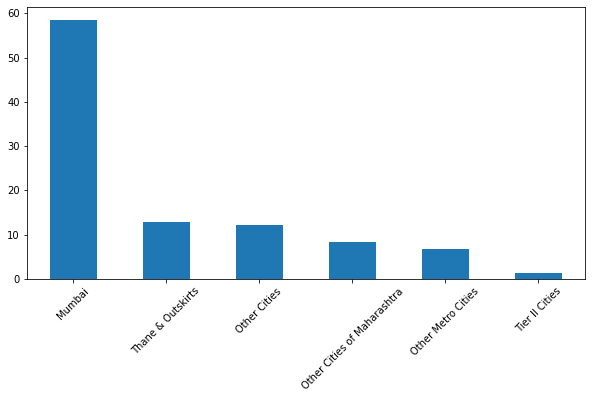

In [17]:
#imputing values in existing ratio
df['City'] = df['City'].fillna(pd.Series(np.random.choice(['Mumbai', 'Thane & Outskirts', 'Other Cities', 'Other Cities of Maharashtra', 'Other Metro Cities', 'Tier II Cities'],
                                             p=[0.59, 0.13, 0.12, 0.08, 0.07, 0.01], size=len(df))))
##levels in City now
df['City'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot(kind = 'bar', figsize = [10,5])
plt.xticks(rotation = 45)

In [18]:
#levels in Specialization
df['Specialization'].value_counts(dropna = False, normalize = True).mul(100).round(2)

NaN                                  36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

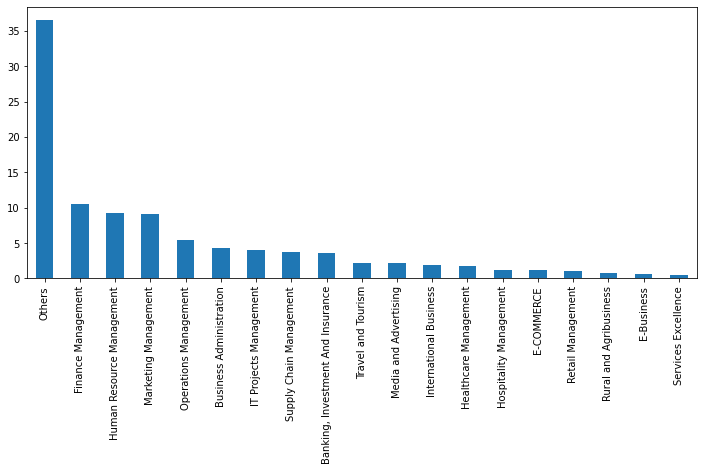

In [19]:
#Specialization is industry domain in which the customer worked before
#replacing NaN's with 'Others' as these values may correspond to students/freshers
df['Specialization'].fillna('Others', inplace = True)
df['Specialization'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot(kind = 'bar', figsize = [12,5])

In [20]:
#levels in Tags
df['Tags'].value_counts(dropna = False, normalize = True).mul(100).round(2)

NaN                                                  36.29
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.

In [21]:
#imputing missing values with mode
df['Tags'].fillna('Unknown', inplace = True)

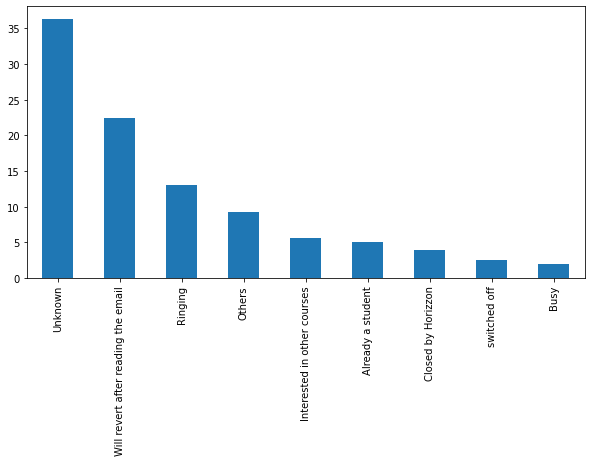

In [22]:
#combining less frequent levels into one, 'Others'
x = df['Tags'].value_counts(normalize = True).mul(100)
df['Tags'] = df['Tags'].replace(list(x[x < 2].index), 'Others')
df['Tags'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot(kind = 'bar', figsize = [10,5])

In [23]:
#levels in 'What matters most to you in choosing a course'
df['What matters most to you in choosing a course'].value_counts(dropna = False, normalize = True).mul(100).round(2)

Better Career Prospects      70.65
NaN                          29.32
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64



> A huge percentage of values excluding null values are 'Better Career Prospects' and after imputing the most frequent level, the other levels remain insignificant. So, this column can be dropped as it will not be useful for analysis.


In [24]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Prospect ID', 'Lead Number', 'What matters most to you in choosing a course']

In [25]:
#levels in 'What is your current occupation'
df['What is your current occupation'].value_counts(dropna = False, normalize = True).mul(100).round(2)

Unemployed              60.61
NaN                     29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

In [26]:
#imputing with mode, 'Unemployed'
df['What is your current occupation'].fillna('Unemployed', inplace = True)

In [27]:
#levels in country
df['Country'].value_counts(dropna = False, normalize = True).mul(100).round(2)

India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.06
France                   0.06
unknown                  0.05
Kuwait                   0.04
South Africa             0.04
Canada                   0.04
Nigeria                  0.04
Germany                  0.04
Sweden                   0.03
Philippines              0.02
Uganda                   0.02
Italy                    0.02
Bangladesh               0.02
Netherlands              0.02
Asia/Pacific Region      0.02
China                    0.02
Belgium                  0.02
Ghana                    0.02
Kenya                    0.01
Sri Lanka                0.01
Tanzania                 0.01
Malaysia                 0.01
Liberia   



> Again, almost all the values except null values are, 'India'. This column is not useful for any analysis, so it can be dropped.



In [28]:
cols_to_drop.append('Country')
cols_to_drop

['Prospect ID',
 'Lead Number',
 'What matters most to you in choosing a course',
 'Country']

In [29]:
#dropping the columns in cols_to_drop
df.drop(cols_to_drop, axis = 1, inplace = True)

In [30]:
#Remaining columns with missing values

x = (df.isna().sum()/df.shape[0]*100)
x[x > 0].sort_values(ascending = False)

TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
Lead Source             0.389610
dtype: float64

In [31]:
#TotalVisits
#imputing median
m = df['TotalVisits'].median()
df['TotalVisits'].fillna(m, inplace = True)

In [32]:
#TotalVisits
#imputing median
m = df['Page Views Per Visit'].median()
df['Page Views Per Visit'].fillna(m, inplace = True)

In [33]:
#levels in 'Last Activity'
df['Last Activity'].value_counts(dropna = False, normalize = True).mul(100).round(2)

Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
NaN                              1.11
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Received                   0.02
Email Marked Spam                0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

In [34]:
#imputing most frequent level
df['Last Activity'].fillna('Email Opened', inplace = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

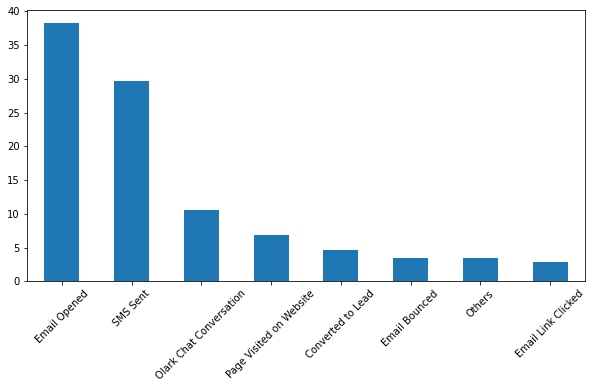

In [35]:
#combining less frequent levels into one, 'Others'
x = df['Last Activity'].value_counts(normalize = True).mul(100)
df['Last Activity'] = df['Last Activity'].replace(list(x[x < 2].index), 'Others')
df['Last Activity'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot(kind = 'bar', figsize = [10,5])
plt.xticks(rotation = 45)

In [36]:
#levels in 'Lead Source'

df['Lead Source'].value_counts(dropna = False, normalize = True).mul(100).round(2)

Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
NaN                   0.39
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

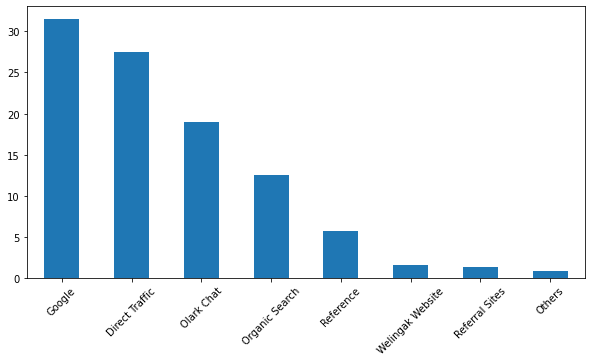

In [37]:
#imputing most frequent level, 'Google
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Google')

#replacing google with Google
df['Lead Source'] = df['Lead Source'].replace('google','Google')

#combining less frequent levels into one, 'Others'
x = df['Lead Source'].value_counts(normalize = True).mul(100)
df['Lead Source'] = df['Lead Source'].replace(list(x[x < 1].index), 'Others')
df['Lead Source'].value_counts(dropna = False, normalize = True).mul(100).round(2).plot(kind = 'bar', figsize = [10,5])
plt.xticks(rotation = 45)

In [38]:
#checking for missing values again
df.isna().any()

Lead Origin                                 False
Lead Source                                 False
Do Not Email                                False
Do Not Call                                 False
Converted                                   False
TotalVisits                                 False
Total Time Spent on Website                 False
Page Views Per Visit                        False
Last Activity                               False
Specialization                              False
What is your current occupation             False
Search                                      False
Magazine                                    False
Newspaper Article                           False
X Education Forums                          False
Newspaper                                   False
Digital Advertisement                       False
Through Recommendations                     False
Receive More Updates About Our Courses      False
Tags                                        False




> There are no missing values in data now.



### Outlier Analysis

In [39]:
#Function for visualizing numerical variables, box plot
def box_plot(x):
    ax = sns.boxplot(y = df[x], color = 'darkcyan', showfliers = True, showmeans = True, 
                     meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"})
    ax.set_ylabel('')
    ax.set_title('{}'.format(x), fontsize = 14, fontweight = 'bold', pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

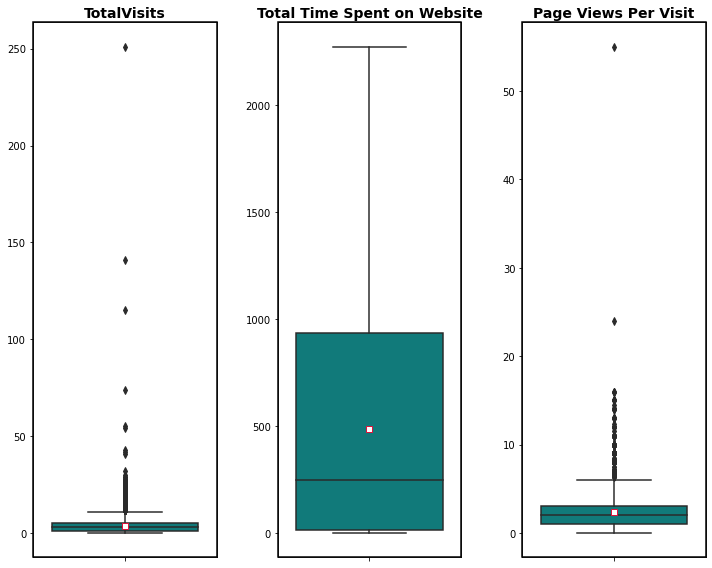

In [40]:
plt.figure(figsize = [10,8])
num_cols = [col for col in df.select_dtypes(include = np.number).columns if col != 'Converted']
for i in range(len(num_cols)):
    plt.subplot(1,len(num_cols),i+1)
    box_plot(num_cols[i])
plt.tight_layout()



> 250 is an absurdly high value for Total visits. Presence of these extreme outliers can effect the performance of model. We can get rid of these.



In [41]:
lim1 = df['TotalVisits'].quantile(0.995)
lim2 = df['Page Views Per Visit'].quantile(0.995)

In [42]:
df = df[~((df['TotalVisits'] > lim1) | (df['Page Views Per Visit'] > lim2))]

In [43]:
df.shape

(9167, 26)

## Exploratory Data Analysis

In [44]:
#Imbalance in target
df['Converted'].value_counts()

0    5636
1    3531
Name: Converted, dtype: int64

In [45]:
#visualizing imbalance
im = df['Converted'].value_counts()
im_df = pd.DataFrame({'labels': im.index,'values': im.values})
px.pie(im_df, names ='labels',values='values', title='Target Imbalance', hole = 0.35)

### Analysing Catagorical Variables

In [46]:
#catagorical columns
cat_cols = [col for col in df.select_dtypes(exclude = np.number).columns]
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [47]:
#number of distinct levels in catagorical columns
df[cat_cols].nunique().sort_values()

I agree to pay the amount through cheque     1
Get updates on DM Content                    1
Update me on Supply Chain Content            1
Receive More Updates About Our Courses       1
Magazine                                     1
X Education Forums                           2
Do Not Email                                 2
Do Not Call                                  2
Search                                       2
Newspaper Article                            2
A free copy of Mastering The Interview       2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Lead Origin                                  5
City                                         6
What is your current occupation              6
Last Activity                                8
Lead Source                                  8
Tags                                         9
Last Notable Activity                       16
Specializatio

In [48]:
#Identifying redundant features, which have only one level
x = df[cat_cols].nunique()
cols_to_drop = list(x[x < 2].index)
cols_to_drop

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [49]:
#dropping the columns in col_to_drop
df.drop(cols_to_drop, axis = 1, inplace = True)
cat_cols = list(set(cat_cols) - set(cols_to_drop))

In [50]:
#binary catagorical variables
x = df[cat_cols].nunique()
binary_cat_cols = list(x[x == 2].index)
binary_cat_cols

['Through Recommendations',
 'Do Not Call',
 'Newspaper',
 'Search',
 'Do Not Email',
 'Digital Advertisement',
 'X Education Forums',
 'Newspaper Article',
 'A free copy of Mastering The Interview']

In [51]:
sns.set_style("whitegrid", {"grid.color": ".2", "grid.linestyle": ":"})

In [52]:
#Function for visualizing composition of levels in catagorical variables, count plot

def hue_count(x, y, p = 'deep'):
    ax = sns.countplot(df[x], hue = df[y], palette = p)
    ax.set_title('"{}" Composition'.format(x), fontsize = 15, fontweight = 'bold', pad = 5)
    ax.set_xlabel(x, fontsize = 14)
    ax.set_ylabel('Count', fontsize = 14)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)  


#Function for visualizing numerical and catagorical variables together, box plot

def box_plot2(x, y, p = 'deep'):
    ax = sns.boxplot(df[x], df[y], palette = p, showfliers = True, showmeans = True, 
                     meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"})
    ax.set_title('Distribution of "{}"'.format(y), fontsize = 15, fontweight = 'bold', pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

Defining Conversion rate,

**Conversion rate** is calculated as the number of leads that converted per total number of leads, expressed as a percentage.

* **Conversion Rate** = (Number of Conversions / Total number of Leads) * 100

In [53]:
#Function for visualizing conversion rate of categories

def conversion_rate_plot(x, y = 'Converted', p = 'deep'):
    ax = sns.barplot(df[x], df[y], estimator = np.mean, palette = p, ci = None)
    ax.set_title('Conversion Rate'.format(y,x), fontsize = 15, fontweight = 'bold', pad = 5)
    ax.set_xlabel(x, fontsize = 14)
    ax.set_ylabel('Rate', fontsize = 14)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)
    for k in ax.patches:
        ax.annotate('{:.1f} %'.format(k.get_height()*100),(k.get_x()+0.25, k.get_height()))

In [54]:
#Lead Origin

df['Lead Origin'].value_counts(normalize = True).mul(100).round(2)

Landing Page Submission    52.68
API                        38.89
Lead Add Form               7.82
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

In [55]:
#adding quick Add form to Lead Add Form
df['Lead Origin'].replace({'Quick Add Form': 'Lead Add Form'}, inplace = True)

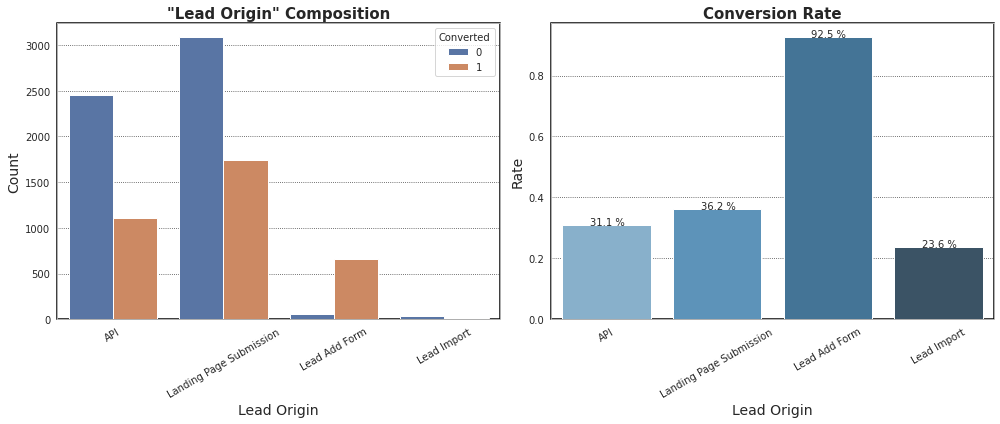

In [56]:
#Lead Origin

plt.figure(figsize = [14,6])
plt.subplot(121)
hue_count('Lead Origin', 'Converted')
plt.xticks(rotation = 30)

# Rate of conversion
plt.subplot(122)
conversion_rate_plot('Lead Origin', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 30)

plt.tight_layout()



> The number of customers that were identified as leads by API and Landing Page Submission are highest, but their conversion rate is less than the average overall conversion rate, i.e, 38.5 %.


> Eventhough, Lead Add Form identifies brings in less leads but the conversion rate of the leads identified by the it is very high. Company should try to bring in more leads by this method.





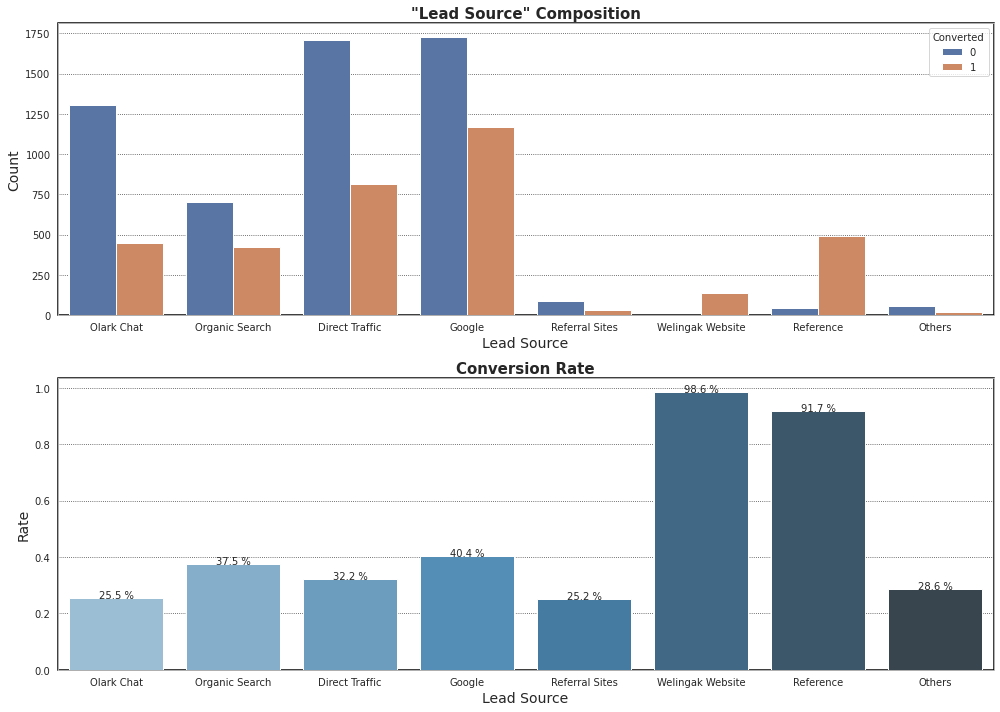

In [57]:
#Lead Source

plt.figure(figsize = [14,10])
plt.subplot(211)
hue_count('Lead Source', 'Converted')

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Lead Source', 'Converted', p = 'Blues_d')

plt.tight_layout()



> Most number of leads come from Google and Direct Traffic. Conversion rate of leads from direct traffic is less than overall conversion rate and the same for Google is slightly more than overall average.


> A very high percentage of leads from welingak website and References have converted. The company should invest more resources into acquiring leads from these sources.





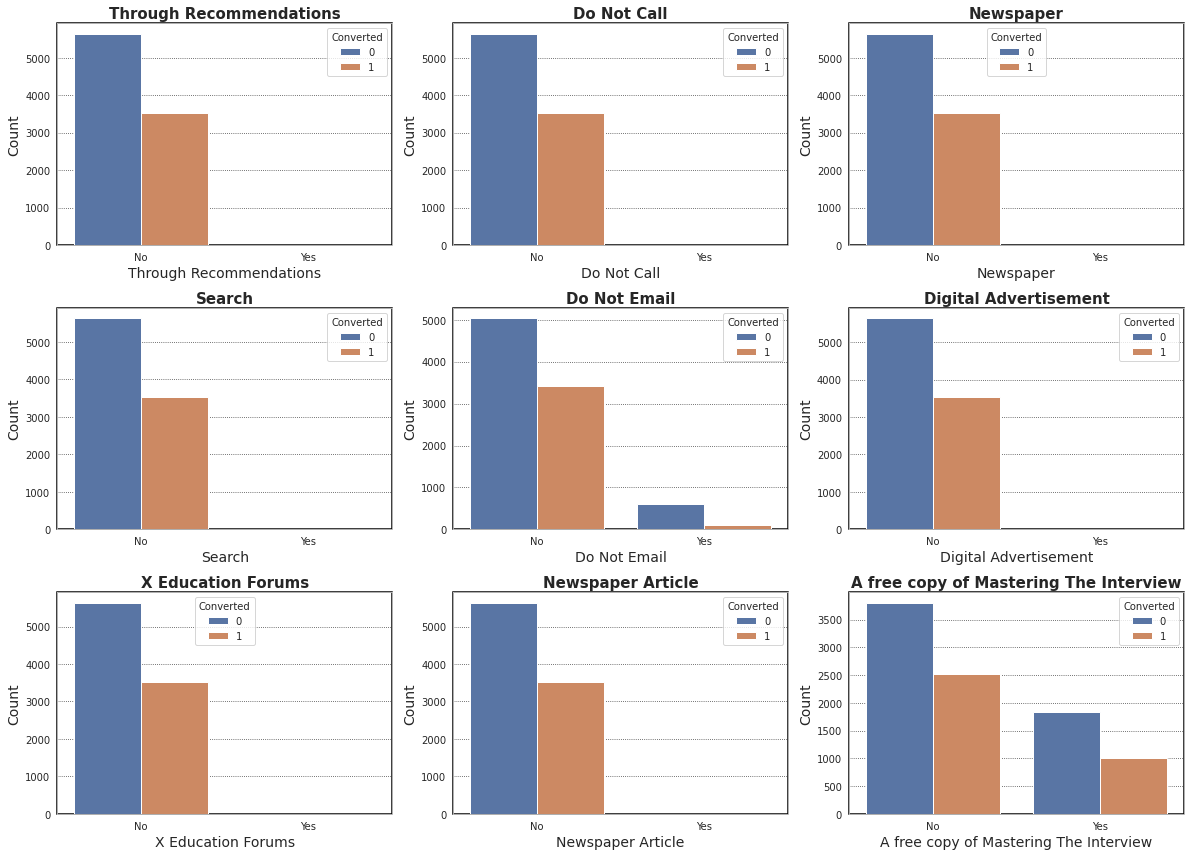

In [58]:
#visualizing binary catagorical variables
plt.figure(figsize = [17, 12])
for i in range(len(binary_cat_cols)):
    plt.subplot(3, 3, i+1)
    x, y = binary_cat_cols[i], 'Converted'
    ax = sns.countplot(df[x], hue = df[y], palette = 'deep')
    ax.set_title('{}'.format(x), fontsize = 15, fontweight = 'bold', pad = 5)
    ax.set_xlabel(x, fontsize = 14)
    ax.set_ylabel('Count', fontsize = 14)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)  
plt.tight_layout()



> It looks like for many of the variable here, one of the level is highly dominant and the other has almost no contribution. These variable are not useful for the model, so we can drop them. 



In [59]:
for k in binary_cat_cols:    
    print('{}\n'.format(df[k].value_counts()))

No     9160
Yes       7
Name: Through Recommendations, dtype: int64

No     9165
Yes       2
Name: Do Not Call, dtype: int64

No     9166
Yes       1
Name: Newspaper, dtype: int64

No     9153
Yes      14
Name: Search, dtype: int64

No     8448
Yes     719
Name: Do Not Email, dtype: int64

No     9163
Yes       4
Name: Digital Advertisement, dtype: int64

No     9166
Yes       1
Name: X Education Forums, dtype: int64

No     9165
Yes       2
Name: Newspaper Article, dtype: int64

No     6321
Yes    2846
Name: A free copy of Mastering The Interview, dtype: int64



In [60]:
cols_to_drop = ['Do Not Call',
                'Search',
                'Newspaper Article',
                'X Education Forums',
                'Newspaper',
                'Digital Advertisement',
                'Through Recommendations']

#updating the list of binary catagorical variables
binary_cat_cols = list(set(binary_cat_cols) - set(cols_to_drop))
cat_cols = list(set(cat_cols) - set(cols_to_drop))

#dropping the columns in cols_to_drop
df.drop(cols_to_drop, axis = 1, inplace = True)

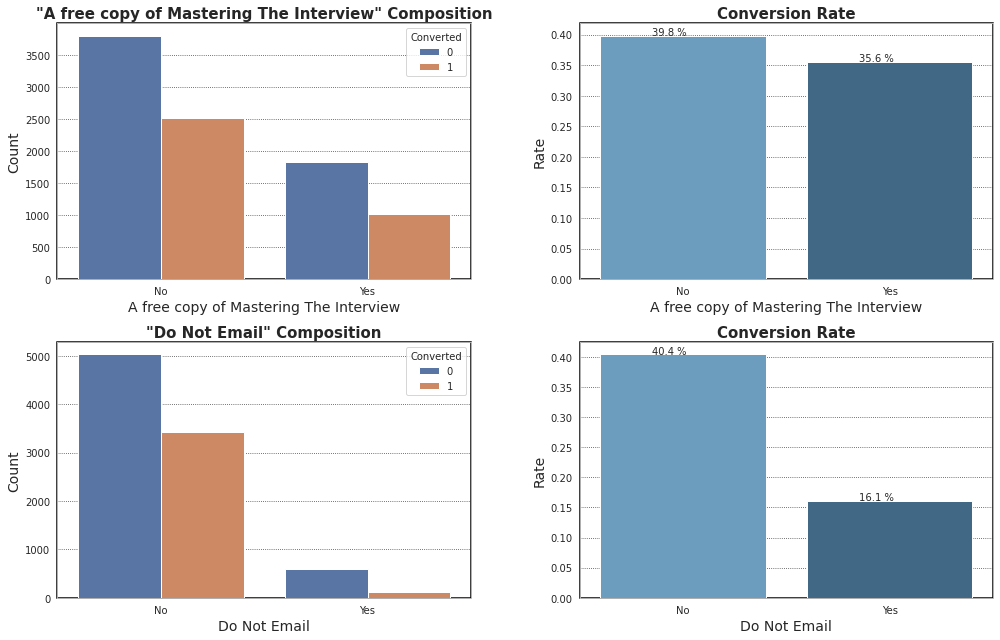

In [61]:
#visualizing binary catagorical variables again

plt.figure(figsize = [14, 9])
for i in range(len(binary_cat_cols)):
    plt.subplot(2, 2, 2*i+1)
    hue_count(binary_cat_cols[i], 'Converted')
    plt.subplot(2, 2, 2*i+2)
    conversion_rate_plot(binary_cat_cols[i], 'Converted', p = 'Blues_d')

plt.tight_layout()



> Customers who selected to not get emailed about course converted significantly more than those who selected to get emailed about course. This group can be targeted more.


> Customers who did not want a copy of 'Mastering The Interview' had slightly more conversion rate. 




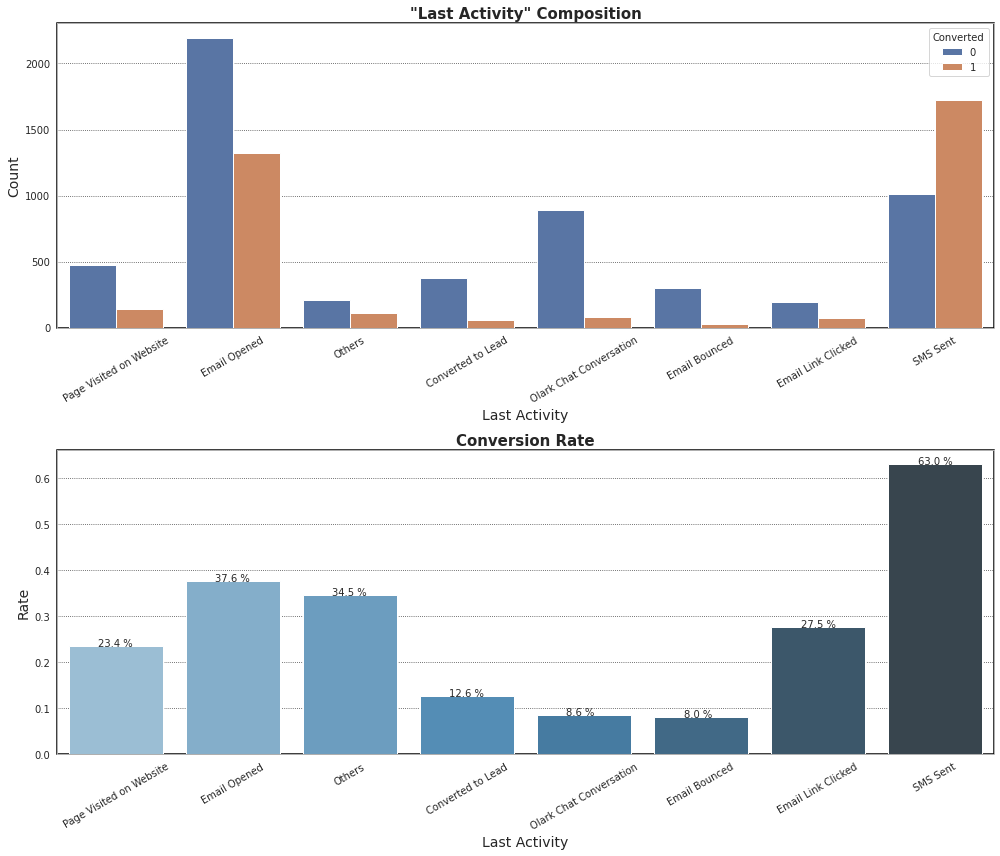

In [62]:
#Last Activity

plt.figure(figsize = [14,12])
plt.subplot(211)
hue_count('Last Activity', 'Converted')
plt.xticks(rotation = 30)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Last Activity', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 30)

plt.tight_layout()

In [63]:
#Specialization

df['Specialization'].value_counts(normalize = True).mul(100).round(2)

Others                               36.74
Finance Management                   10.56
Human Resource Management             9.17
Marketing Management                  9.07
Operations Management                 5.48
Business Administration               4.34
IT Projects Management                3.96
Supply Chain Management               3.77
Banking, Investment And Insurance     3.64
Media and Advertising                 2.17
Travel and Tourism                    2.16
International Business                1.91
Healthcare Management                 1.71
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.04
Rural and Agribusiness                0.77
E-Business                            0.62
Services Excellence                   0.44
Name: Specialization, dtype: float64

In [64]:
#combining less frequent levels into one, 'Others'
x = df['Specialization'].value_counts(normalize = True).mul(100)
df['Specialization'] = df['Specialization'].replace(list(x[x < 2].index), 'Others')

df['Specialization'].value_counts(normalize = True).mul(100).round(2)

Others                               45.67
Finance Management                   10.56
Human Resource Management             9.17
Marketing Management                  9.07
Operations Management                 5.48
Business Administration               4.34
IT Projects Management                3.96
Supply Chain Management               3.77
Banking, Investment And Insurance     3.64
Media and Advertising                 2.17
Travel and Tourism                    2.16
Name: Specialization, dtype: float64

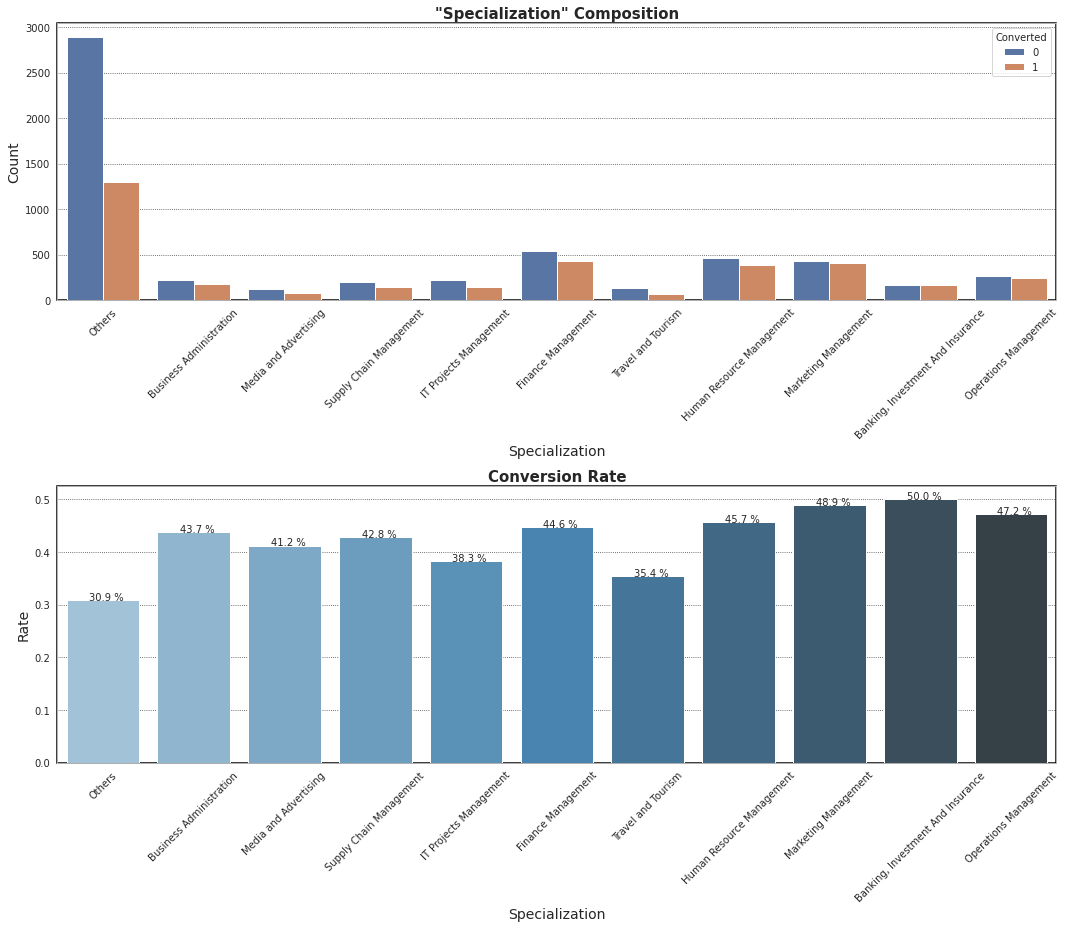

In [65]:
#Specialization

plt.figure(figsize = [15,13])
plt.subplot(211)
hue_count('Specialization', 'Converted')
plt.xticks(rotation = 45)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Specialization', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 45)

plt.tight_layout()



> Leads from Management sector, like HR and Marketing Management, and Banking, Investment and Insurance specialization are relatively more likely to convert. Their average conversion rate is higher than the overall average. These groups can be targettd more. 



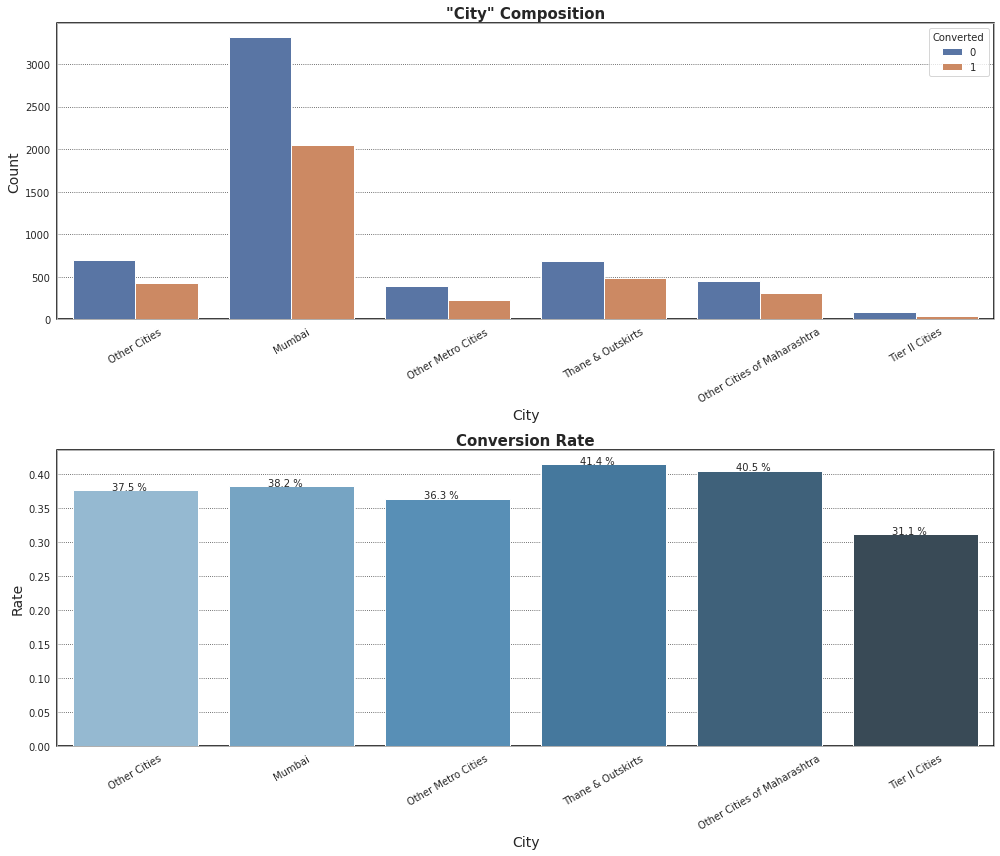

In [66]:
#City

plt.figure(figsize = [14,12])
plt.subplot(211)
hue_count('City', 'Converted')
plt.xticks(rotation = 30)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('City', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 30)

plt.tight_layout()



> A huge proportion of leads acquired are from Mumbai. Conversion rates for all the cities is close to the overall average, 38.5 %.



In [67]:
#Last Notable Activity

df['Last Notable Activity'].value_counts(normalize = True).mul(100).round(2)

Modified                        36.93
Email Opened                    30.61
SMS Sent                        23.60
Page Visited on Website          3.28
Olark Chat Conversation          1.99
Email Link Clicked               1.87
Email Bounced                    0.65
Unsubscribed                     0.50
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Approached upfront               0.01
Resubscribed to emails           0.01
View in browser link Clicked     0.01
Form Submitted on Website        0.01
Email Received                   0.01
Name: Last Notable Activity, dtype: float64

In [68]:
#combining less frequent levels into one, 'Others'
x = df['Last Notable Activity'].value_counts(normalize = True).mul(100)
df['Last Notable Activity'] = df['Last Notable Activity'].replace(list(x[x < 1].index), 'Others')

df['Last Notable Activity'].value_counts(normalize = True).mul(100).round(2)

Modified                   36.93
Email Opened               30.61
SMS Sent                   23.60
Page Visited on Website     3.28
Olark Chat Conversation     1.99
Email Link Clicked          1.87
Others                      1.73
Name: Last Notable Activity, dtype: float64

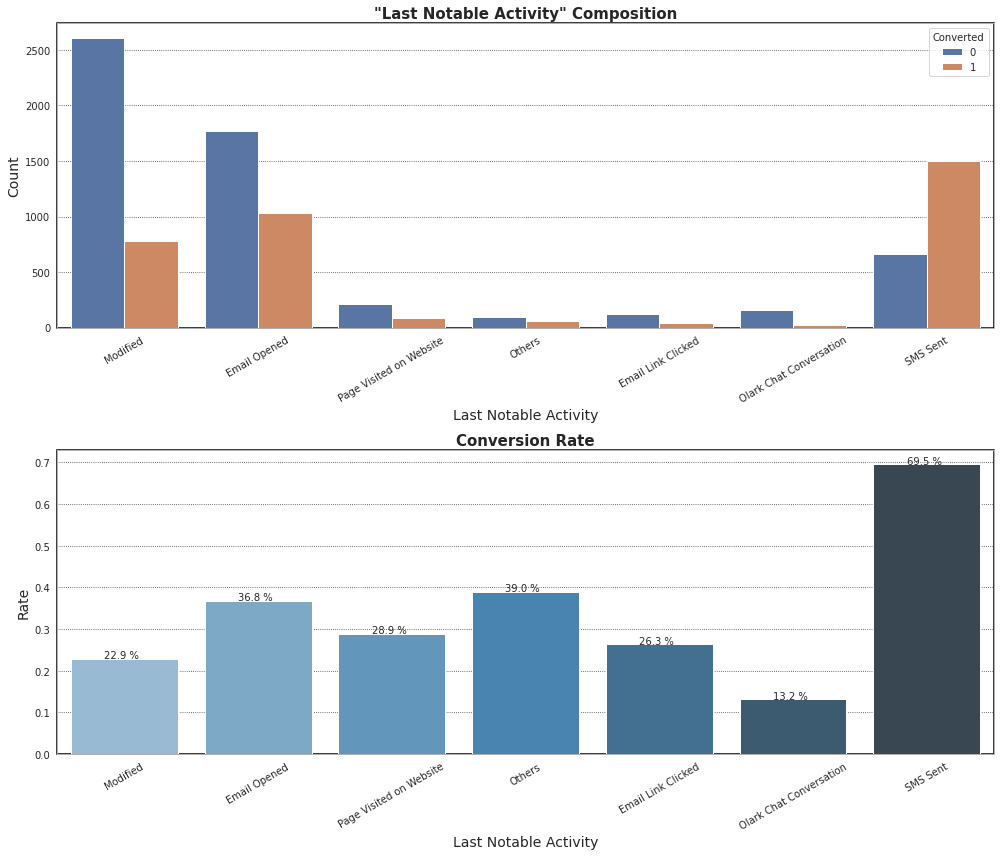

In [69]:
#Last Notable Activity

plt.figure(figsize = [14,12])
plt.subplot(211)
hue_count('Last Notable Activity', 'Converted')
plt.xticks(rotation = 30)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Last Notable Activity', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 30)

plt.tight_layout()

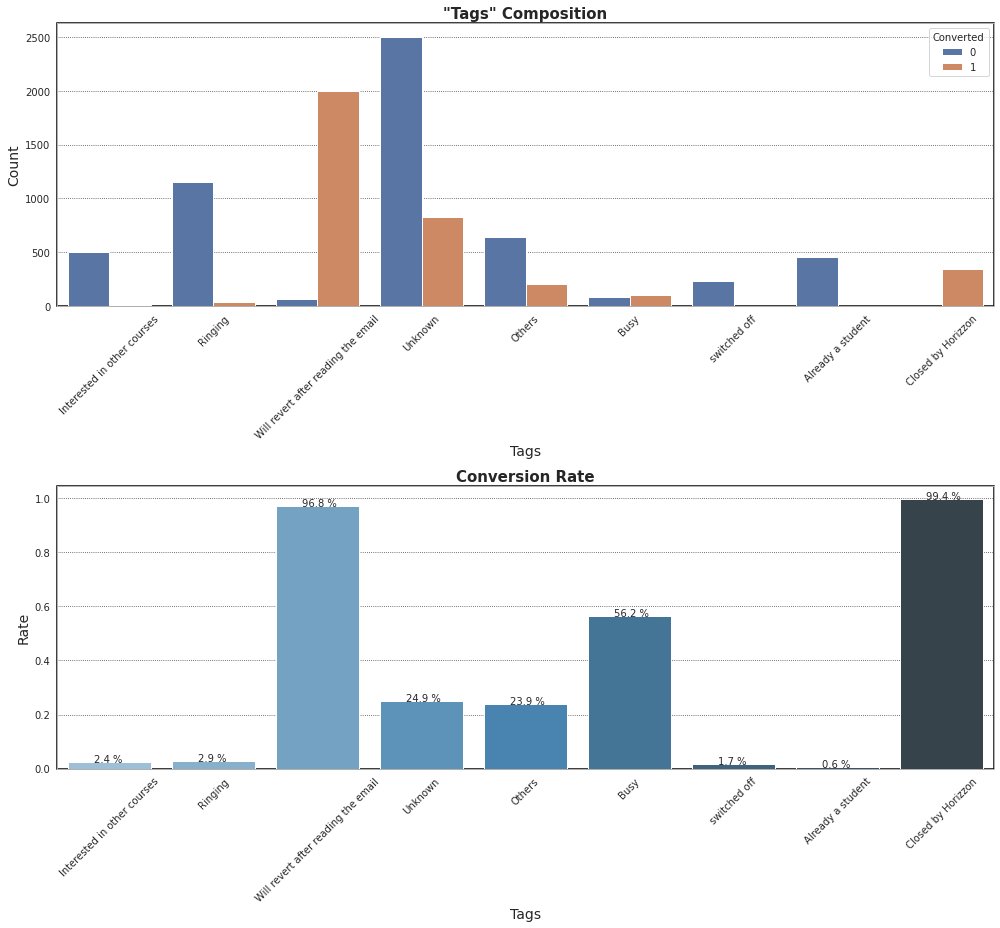

In [70]:
#Tags

plt.figure(figsize = [14,13])
plt.subplot(211)
hue_count('Tags', 'Converted')
plt.xticks(rotation = 45)


# Rate of conversion
plt.subplot(212)
conversion_rate_plot('Tags', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 45)

plt.tight_layout()



> Leads with tags/current status, 'Will revert after reading the email' have a very high likelyhood of converting. This group has high potential leads.


> People with tags, 'Already a Student', 'Interested in other courses', 'Ringing' have very low conversion rate. The company should spend less resources on people in this group.




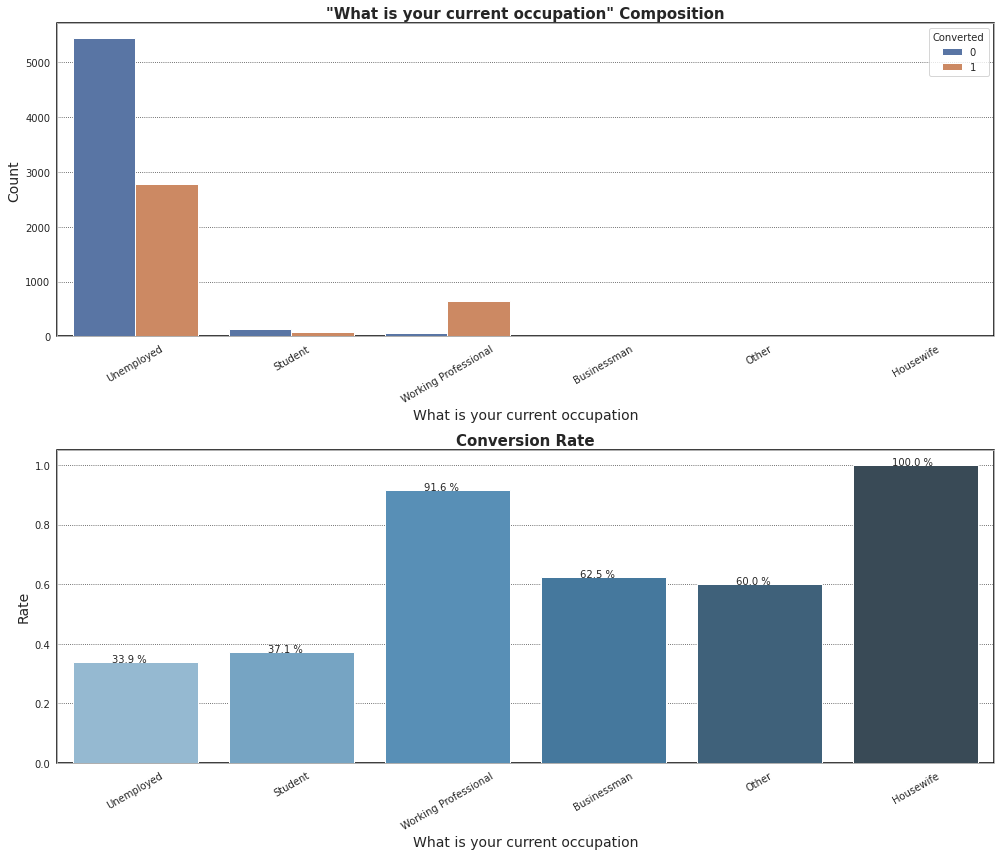

In [71]:
#What is your current occupation

plt.figure(figsize = [14,12])
plt.subplot(211)
hue_count('What is your current occupation', 'Converted')
plt.xticks(rotation = 30)

# Rate of conversion
plt.subplot(212)
conversion_rate_plot('What is your current occupation', 'Converted', p = 'Blues_d')
plt.xticks(rotation = 30)

plt.tight_layout()



> Unemployed people are least likely to convert. Working professionals have a very high conversion rate. They should be targetted more.


> Housewives have a 100% conversion rate but the data for housewives is too small to make a confident inference.





In [72]:
df['What is your current occupation'].value_counts()

Unemployed              8220
Working Professional     704
Student                  210
Other                     15
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [73]:
df[cat_cols].nunique().sum()

63

### Analysing Numerical Variables

<Figure size 1296x1152 with 0 Axes>

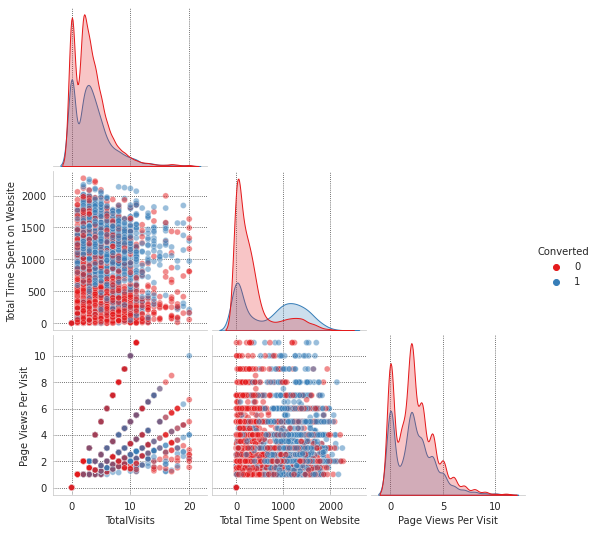

In [74]:
plt.figure(figsize = [18,16])
cols = ['Converted']
cols.extend(num_cols)
sns.pairplot(df[cols], hue = 'Converted', corner = True, plot_kws = {'alpha': 0.5}, palette = 'Set1')

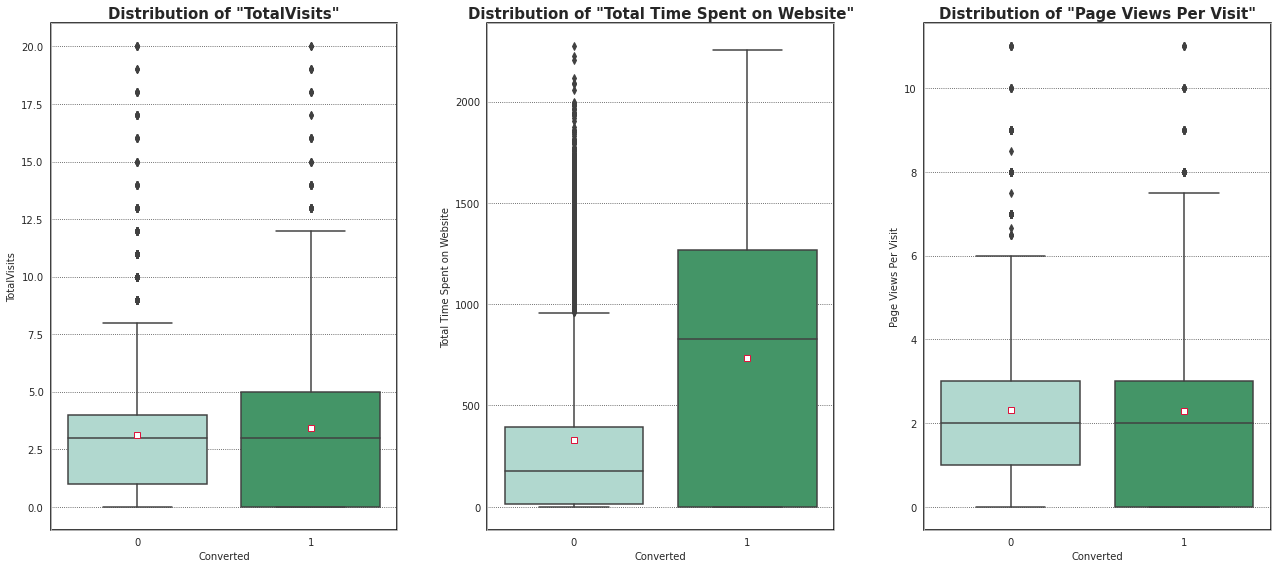

In [75]:
#distribution of numerical variables with respect to target

plt.figure(figsize = [18,8])
for i in range(len(num_cols)):
    plt.subplot(1, 3, i+1)
    box_plot2('Converted', num_cols[i], p = 'BuGn')
plt.tight_layout()



> The average and median total number of visits made by the leads is almost the same. The average and median total number of page views per visit is also almost the same. In case of all three variables, the values are more spread out for the leads that converted.


> Leads that spend more time on the website are more likely to convert. These people show be pursued more. Also, websites can be made more engaging and user-friendly to improve the numbers.





## Data Modeling

### preprocessing

In [76]:
#creating a copy of datframe

leads_df = df.copy()
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Other Cities,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


#### One Hot Encoding catagorical Variables

In [77]:
#catagorical features

cat_cols = [col for col in leads_df.select_dtypes(exclude = np.number).columns]
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [78]:
#binary catagorical features

binary_cat_cols

['A free copy of Mastering The Interview', 'Do Not Email']

In [79]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[binary_cat_cols] = leads_df[binary_cat_cols].apply(binary_map)

In [80]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Other Cities,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [81]:
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [82]:
df['Specialization'].value_counts()

Others                               4187
Finance Management                    968
Human Resource Management             841
Marketing Management                  831
Operations Management                 502
Business Administration               398
IT Projects Management                363
Supply Chain Management               346
Banking, Investment And Insurance     334
Media and Advertising                 199
Travel and Tourism                    198
Name: Specialization, dtype: int64

In [83]:
# Creating dummy variables for the remaining categorical variables and dropping one level

# Leads Origin
lo = pd.get_dummies(leads_df['Lead Origin'], prefix = 'Lead Origin')
lo = lo.drop(['Lead Origin_Lead Import'], axis = 1)
leads_df = pd.concat([leads_df, lo], axis = 1)

# Lead Source
ls = pd.get_dummies(leads_df['Lead Source'], prefix = 'Lead Source')
ls = ls.drop(['Lead Source_Others'], axis = 1)
leads_df = pd.concat([leads_df, ls], axis = 1)

# Last Activity
la = pd.get_dummies(leads_df['Last Activity'], prefix = 'Last Activity')
la = la.drop(['Last Activity_Others'], axis = 1)
leads_df = pd.concat([leads_df, la], axis = 1)

# Specialization
sp = pd.get_dummies(leads_df['Specialization'], prefix = 'Specialization')
sp = sp.drop(['Specialization_Others'], axis = 1)
leads_df = pd.concat([leads_df, sp], axis = 1)

# What is your current occupation
wco = pd.get_dummies(leads_df['What is your current occupation'], prefix = 'What is your current occupation')
wco = wco.drop(['What is your current occupation_Other'], axis = 1)
leads_df = pd.concat([leads_df, wco], axis = 1)

# Tags
tg = pd.get_dummies(leads_df['Tags'], prefix = 'Tags')
tg = tg.drop(['Tags_Others'], axis = 1)
leads_df = pd.concat([leads_df, tg], axis = 1)

# City
ct = pd.get_dummies(leads_df['City'], prefix = 'City')
ct = ct.drop(['City_Other Cities'], axis = 1)
leads_df = pd.concat([leads_df, ct], axis = 1)

# Last Notable Activity
lna = pd.get_dummies(leads_df['Last Notable Activity'], prefix = 'Last Notable Activity')
lna = lna.drop(['Last Notable Activity_Others'], axis = 1)
leads_df = pd.concat([leads_df, lna], axis = 1)

In [84]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Other Cities,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,0,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


In [85]:
#dropping old catagorical columns as dummies have been created for them

cols = list(set(cat_cols) - set(binary_cat_cols))
leads_df.drop(cols, axis = 1, inplace = True)

In [86]:
leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


#### Train-Test Split

In [87]:
#splitting features from target
X = leads_df.drop('Converted', axis = 1)
y = leads_df['Converted']

In [88]:
Xa = np.array(X)
ya = np.array(y.tolist())

In stratified k-fold, the data is split preserving the percentage of samples for each class. This makes cross validation of model more reliable.

In [89]:
# Splitting the data into train and test

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 10)
for train_index, test_index in skf.split(Xa, ya):
    X_train, y_train = Xa[train_index], ya[train_index]
    X_test, y_test = Xa[test_index], ya[test_index]
    break

In [90]:
#adding back columns
X_train = pd.DataFrame(X_train)
X_train.columns = X.columns
X_test = pd.DataFrame(X_test)
X_test.columns = X.columns

In [91]:
X_train.shape, X_test.shape

((7333, 56), (1834, 56))

In [92]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,2.0,1532.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,305.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,2.0,1428.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [93]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_switched off,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,5.0,674.0,2.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,6.0,973.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,6.0,1688.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,6.0,1315.0,6.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,5.0,182.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Scaling Numerical Features

In [94]:
#numerical features
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [95]:
#defining scaler object
scaler = StandardScaler()

#fitting scaler and transforming X_train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#transforming X_test
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [96]:
X_train[num_cols].agg([np.mean, np.std]).round(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
mean,0.0,-0.0,0.0
std,1.0,1.0,1.0


In [97]:
X_test[num_cols].agg([np.mean, np.std]).round(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
mean,-0.00,-0.01,0.01
std,0.98,0.99,1.00


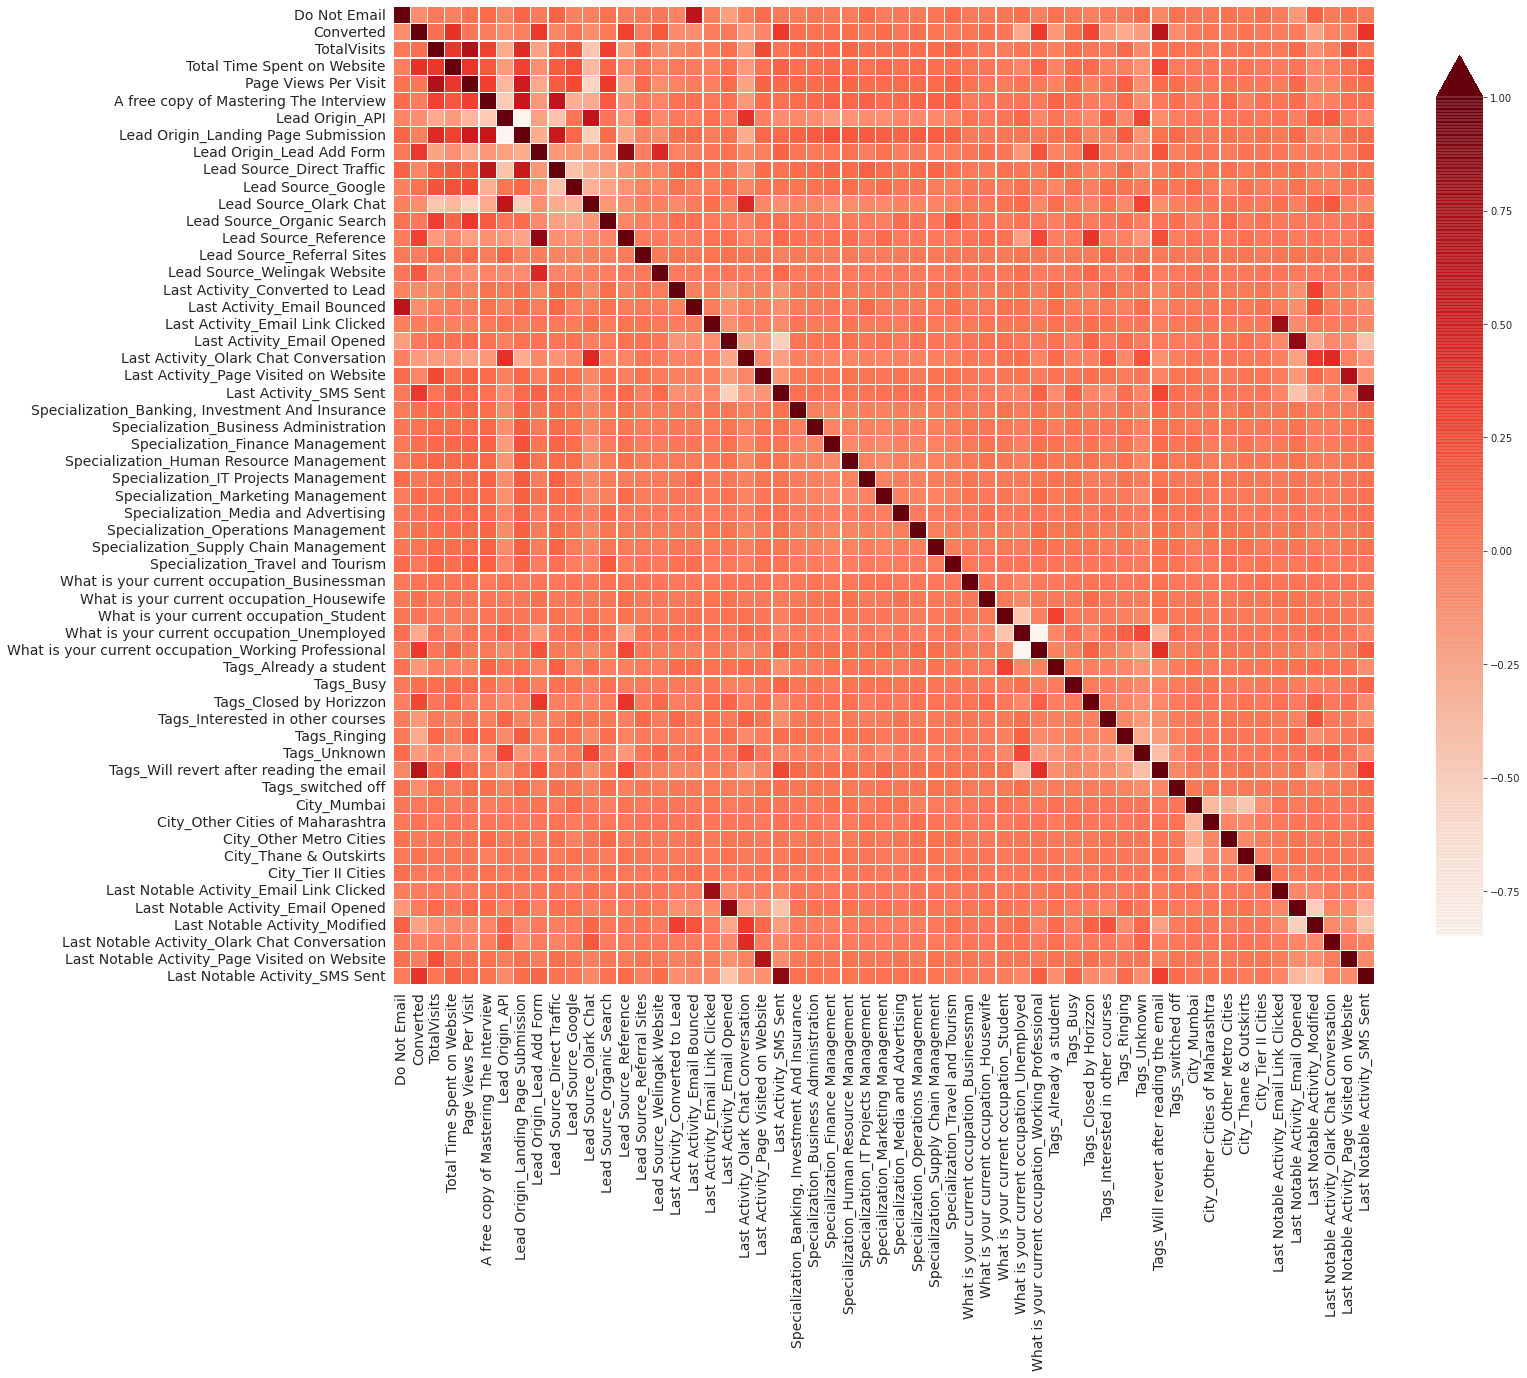

In [98]:
# Let's see the correlation matrix

plt.figure(figsize = [22,18])
cbar_kws={'orientation':'vertical', 'shrink':0.9,'extend':'max',
          'extendfrac':0.05, 'drawedges':True, 'pad':0.05, 'aspect':18}
sns.heatmap(leads_df.corr(), annot = False, cmap = 'Reds', linecolor = 'w', linewidth = 0.2, cbar_kws = cbar_kws)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()



> As observed, there are high correlations between some some of the varibles and therefore, data has multicollinearity.



### Model Buiding (Logistic Regression)

In [99]:
# Fuction for making logistic regression model

def build_model(cols):
    # Logistic regression model
    X_train_sm = sm.add_constant(X_train[cols])
    logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    lr = logm.fit()
    return lr

## Returns model

#### Building the first Model Using Statsmodel

In [100]:
cols = X.columns

In [101]:
lr1 = build_model(cols)
print(lr1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7333
Model:                            GLM   Df Residuals:                     7276
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1600.7
Date:                Fri, 08 Apr 2022   Deviance:                       3201.4
Time:                        03:50:53   Pearson chi2:                 1.10e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Feature Selection using RFE (coarse tuning)

Recursive feature elimination reduces model complexity by removing features one by one until the optimal number of features is left. This is achieved by fitting the given machine learning algorithm used in the core of the model,ranking features by importance, discarding the least important features, and re-fitting the model.

In [102]:
#importing utility
from sklearn.feature_selection import RFE

In [103]:
#Eliminating features using RFE
model = LogisticRegression()
selector = RFE(estimator = model, n_features_to_select = 18)
selector.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=18)

In [104]:
sum(selector.support_)

18

In [105]:
L = list(zip(X_train.columns,selector.support_,selector.ranking_))
L

[('Do Not Email', True, 1),
 ('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('A free copy of Mastering The Interview', False, 37),
 ('Lead Origin_API', False, 25),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 29),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 2),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 14),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 4),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 

In [106]:
#columns selected by RFE
selected_cols = X_train.columns[selector.support_]
selected_cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Fine tuning using VIF and p-values corresponding to t-statistic

In [107]:
#importing utility
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
#function to check for the VIF values of the feature variables. 
def get_vif(cols):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

##### Model 2

In [109]:
#builing model with features selected by RFE
cols = selected_cols

lr = build_model(cols)
print(lr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7333
Model:                            GLM   Df Residuals:                     7314
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1648.3
Date:                Fri, 08 Apr 2022   Deviance:                       3296.7
Time:                        03:50:59   Pearson chi2:                 9.81e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [110]:
#model 2 VIFs

get_vif(cols)

,Features,VIF
17,Last Notable Activity_SMS Sent,6.34
6,Last Activity_SMS Sent,6.21
16,Last Notable Activity_Modified,2.05
13,Tags_Will revert after reading the email,1.79
2,Lead Origin_Lead Add Form,1.78
3,Lead Source_Olark Chat,1.65
5,Last Activity_Olark Chat Conversation,1.60
1,Total Time Spent on Website,1.37
8,What is your current occupation_Working Profes...,1.33
10,Tags_Closed by Horizzon,1.30


##### Model 3


* Dropping 'Last Notable Activity_SMS Sent' from list of features as it has and high VIF. Most of the information in 'Last Notable Activity_SMS Sent' is explained by 'Last Activity_SMS Sent'.



In [111]:
# dropping 'Last Notable Activity_SMS Sent'

cols = ['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified']

In [112]:
#model 3
lr = build_model(cols)
print(lr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7333
Model:                            GLM   Df Residuals:                     7315
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1662.7
Date:                Fri, 08 Apr 2022   Deviance:                       3325.3
Time:                        03:51:00   Pearson chi2:                 9.49e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [113]:
#model 3 VIFs

get_vif(cols)

,Features,VIF
2,Lead Origin_Lead Add Form,1.78
13,Tags_Will revert after reading the email,1.75
3,Lead Source_Olark Chat,1.64
16,Last Notable Activity_Modified,1.63
5,Last Activity_Olark Chat Conversation,1.56
6,Last Activity_SMS Sent,1.46
1,Total Time Spent on Website,1.36
8,What is your current occupation_Working Profes...,1.33
10,Tags_Closed by Horizzon,1.30
4,Lead Source_Welingak Website,1.29


##### Model 4


* Dropping 'Specialization_Travel and Tourism' for high p-value.



In [114]:
# dropping 'Specialization_Travel and Tourism'

cols = ['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified']

In [115]:
#model 4
lr = build_model(cols)
print(lr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7333
Model:                            GLM   Df Residuals:                     7316
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1665.8
Date:                Fri, 08 Apr 2022   Deviance:                       3331.7
Time:                        03:51:00   Pearson chi2:                 9.47e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [116]:
#model 4 VIFs

get_vif(cols)

,Features,VIF
2,Lead Origin_Lead Add Form,1.78
12,Tags_Will revert after reading the email,1.75
3,Lead Source_Olark Chat,1.64
15,Last Notable Activity_Modified,1.62
5,Last Activity_Olark Chat Conversation,1.56
6,Last Activity_SMS Sent,1.45
1,Total Time Spent on Website,1.36
7,What is your current occupation_Working Profes...,1.33
9,Tags_Closed by Horizzon,1.30
4,Lead Source_Welingak Website,1.29


##### Model 5


* Dropping 'Last Notable Activity_Email Link Clicked' based on p-value.


In [117]:
# dropping 'Last Notable Activity_Email Link Clicked'

cols = ['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified']

In [118]:
#model 5
lr = build_model(cols)
print(lr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 7333
Model:                            GLM   Df Residuals:                     7317
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1670.4
Date:                Fri, 08 Apr 2022   Deviance:                       3340.8
Time:                        03:51:01   Pearson chi2:                 9.48e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [119]:
#model 5 VIFs

get_vif(cols)

,Features,VIF
2,Lead Origin_Lead Add Form,1.78
12,Tags_Will revert after reading the email,1.75
3,Lead Source_Olark Chat,1.62
14,Last Notable Activity_Modified,1.62
5,Last Activity_Olark Chat Conversation,1.56
6,Last Activity_SMS Sent,1.45
1,Total Time Spent on Website,1.36
7,What is your current occupation_Working Profes...,1.33
9,Tags_Closed by Horizzon,1.30
4,Lead Source_Welingak Website,1.29


Final Model

* The final model looks good. p-values corresponding to all the variables is very low, which means all the features in final model are significant.

* VIFs are are < 2 for all the final set of features which means very low multicollinearity.

##### Building final Model using sklearn

In [269]:
#logistic regression model
X_train = X_train[cols]
X_test = X_test[cols]

# switching off the relularization in scikit-learn by setting penalty='none' so that the result is identical to statsmodel's result.
lr_model = LogisticRegression(penalty = 'none', solver = 'newton-cg')
lr_model.fit(X_train,y_train)

#prediction on train set
y_train_prob = lr_model.predict_proba(X_train)[:,1]

### Cut-off Tuning

Defining **Lead Score**,

**Lead Score** = **(Probability of Converting)** * 100

In [270]:
#creating a dataframe to store Lead Score, y_train, and predictions together
lr_pred = pd.DataFrame({'Converted': y_train, 'Convert_prob': y_train_prob, 'Lead Score': (y_train_prob*100).round(2)})

#obtaining results for a cut-off of 0.5
lr_pred['predicted'] = lr_pred['Convert_prob'].map(lambda x: 1 if x > 0.5 else 0)
lr_pred.head()

,Converted,Convert_prob,Lead Score,predicted
0,0,0.011511,1.15,0
1,1,0.990182,99.02,1
2,0,0.001779,0.18,0
3,1,0.963837,96.38,1
4,0,0.035475,3.55,0


In [271]:
#classification report
print(classification_report(lr_pred['Converted'], lr_pred['predicted']))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4508
           1       0.92      0.85      0.88      2825

    accuracy                           0.91      7333
   macro avg       0.91      0.90      0.91      7333
weighted avg       0.91      0.91      0.91      7333




Overall Accuracy Score : 0.91




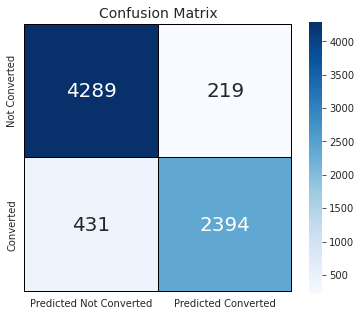

In [272]:
#Confusion Matrix for train data
cm = confusion_matrix(lr_pred['Converted'], lr_pred['predicted'])
cm_df = pd.DataFrame(data = cm)

plt.figure(figsize = (6,5))
sns.heatmap(cm_df, fmt='g', 
            yticklabels=['Not Converted', 'Converted'],
            xticklabels=['Predicted Not Converted', 'Predicted Converted'],
            annot=True,
            linewidths=.2,linecolor="k", cmap = "Blues", square=True, annot_kws={"fontsize":20})
plt.title('Confusion Matrix', fontsize=14)
print('\nOverall Accuracy Score : {}\n\n'.format(accuracy_score(lr_pred['Converted'], lr_pred['predicted']).round(2)))
plt.show()

#### ROC Curve

In [273]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

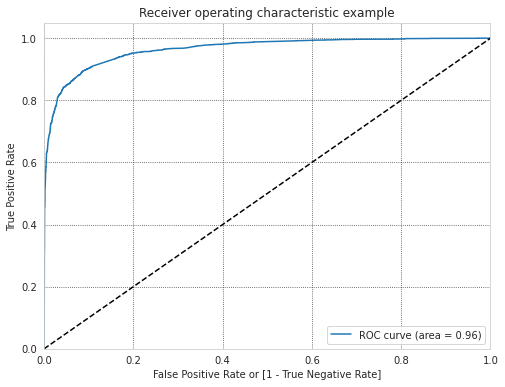

In [274]:
plot_roc(lr_pred['Converted'], lr_pred['Convert_prob'])



> It looks like it is very good model considering in-sample AUC score.



#### Finding Optimal Cut-off point

In [275]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lr_pred[i]= lr_pred['Convert_prob'].map(lambda x: 1 if x > i else 0)
lr_pred.head()

,Converted,Convert_prob,Lead Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.011511,1.15,0,1,0,0,0,0,0,0,0,0,0
1,1,0.990182,99.02,1,1,1,1,1,1,1,1,1,1,1
2,0,0.001779,0.18,0,1,0,0,0,0,0,0,0,0,0
3,1,0.963837,96.38,1,1,1,1,1,1,1,1,1,1,1
4,0,0.035475,3.55,0,1,0,0,0,0,0,0,0,0,0


In [276]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob_thresh','accuracy','sensi','speci'])

num = [float(x)/10 for x in range(10)]
for i in num:
    cm1 = confusion_matrix(lr_pred['Converted'], lr_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob_thresh  accuracy     sensi     speci
0.0          0.0  0.385245  1.000000  0.000000
0.1          0.1  0.795991  0.967788  0.688332
0.2          0.2  0.870858  0.940531  0.827196
0.3          0.3  0.902768  0.900531  0.904170
0.4          0.4  0.908223  0.869735  0.932343
0.5          0.5  0.911360  0.847434  0.951420
0.6          0.6  0.908905  0.819823  0.964729
0.7          0.7  0.895950  0.767080  0.976708
0.8          0.8  0.886404  0.733451  0.982254
0.9          0.9  0.866085  0.667257  0.990683


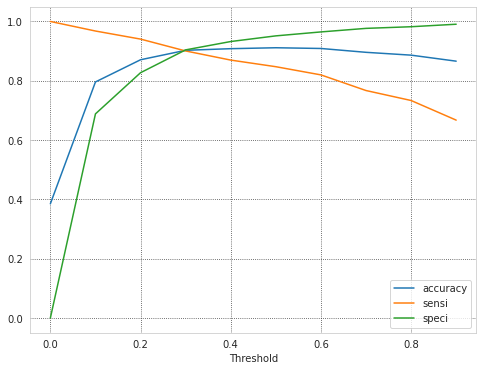

In [277]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob_thresh', y=['accuracy','sensi','speci'], figsize=(8, 6))
plt.xlabel('Threshold')
plt.show()

> We would like both sensitivity and specificity to be high. For the given context, we would like to detect as many positives(leads that convert) as possible accurately and therefore more focus should be on sensitivity.

> At the same time we also would not want to spend much resources on negatives(leads who will not convert). Eventhough it's good to improve specificity, the problem context makes positive class more important than negative class. let's look at confusion matrix with threshold 0.3 for now.

In [278]:
#confusion matrix for cut-off of 0.3
y_train_pred = np.array([1 if i > 0.3 else 0 for i in y_train_prob])
print('\nOverall Accuracy Score : {}\n'.format(accuracy_score(y_train, y_train_pred).round(2)))
print('Train confusion matrix: \n\n {}'.format(confusion_matrix(y_train, y_train_pred)))


Overall Accuracy Score : 0.9

Train confusion matrix: 

 [[4076  432]
 [ 281 2544]]


#### Precision and recall tradeoff

In [279]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(lr_pred['Converted'], lr_pred['Convert_prob'])

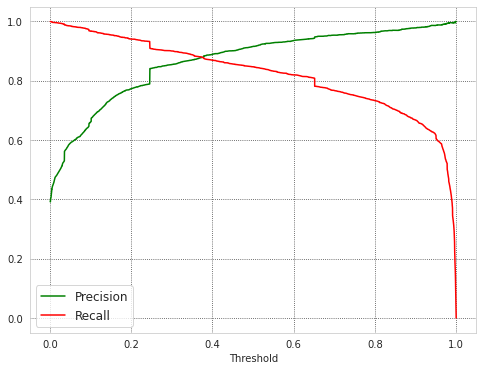

In [280]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, p[:-1], "g-", label = 'Precision')
plt.plot(thresholds, r[:-1], "r-", label = 'Recall')
plt.xlabel('Threshold')
plt.legend(fontsize = 12)
plt.show()



> We want to identify as many positives(leads that will convert) as possible but the CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. 

> So this would mean if the company were to classify only leads predicted as positives(leads that will convert) as **hot leads**, the **precision score has to be above 0.8**.

> So, we can push the threshold a little lower, say **0.27**. Lets look at confusion matrix with this threshold.



In [281]:
#confusion matrix for cut-off of 0.27
y_train_pred = np.array([1 if i > 0.27 else 0 for i in y_train_prob])
print('\nOverall Accuracy : {}%\n'.format((accuracy_score(y_train, y_train_pred)*100).round(2)))
print('Train confusion matrix: \n\n {}'.format(confusion_matrix(y_train, y_train_pred)))


Overall Accuracy : 90.03%

Train confusion matrix: 

 [[4048  460]
 [ 271 2554]]


In [282]:
#classification report
print('\nIn-sample Precision Score   : {}%\n'.format((precision_score(y_train, y_train_pred)*100).round(2)))
print('In-sample Recall Score      : {}%\n'.format((recall_score(y_train, y_train_pred)*100).round(2)))
print('In-sample F-measure         : {}%\n'.format((f1_score(y_train, y_train_pred)*100).round(2)))


In-sample Precision Score   : 84.74%

In-sample Recall Score      : 90.41%

In-sample F-measure         : 87.48%



### Making Prediction on Test Set (Cross Validation)

In [283]:
#prediction on test set
y_prob = lr_model.predict_proba(X_test)[:,1]

In [284]:
#creating a dataframe to store Lead Score, y_test, and predictions together
lr_test = pd.DataFrame({'Converted': y_test, 'Convert_prob': y_prob, 'Lead Score': (y_prob*100).round(2)})

#obtaining results for the cut-off of 0.27
lr_test['final_predicted'] = lr_test['Convert_prob'].map(lambda x: 1 if x > 0.27 else 0)
lr_test.head()

,Converted,Convert_prob,Lead Score,final_predicted
0,0,0.011335,1.13,0
1,0,0.019688,1.97,0
2,1,0.701447,70.14,1
3,1,0.984920,98.49,1
4,0,0.003531,0.35,0



Overall Accuracy : 90.13%




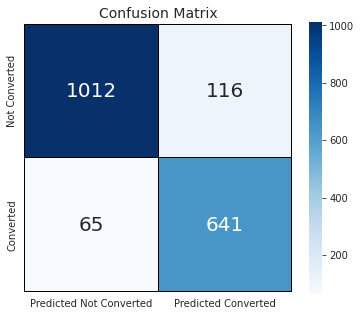

In [285]:
#Confusion Matrix for test data
cm = confusion_matrix(lr_test['Converted'], lr_test['final_predicted'])
cm_df = pd.DataFrame(data = cm)

plt.figure(figsize = (6,5))
sns.heatmap(cm_df, fmt='g', 
            yticklabels=['Not Converted', 'Converted'],
            xticklabels=['Predicted Not Converted', 'Predicted Converted'],
            annot=True,
            linewidths = 0.2, linecolor="k", cmap = "Blues", square=True, annot_kws={"fontsize":20})
plt.title('Confusion Matrix', fontsize=14)
print('\nOverall Accuracy : {}%\n\n'.format((accuracy_score(lr_test['Converted'], lr_test['final_predicted'])*100).round(2)))
plt.show()

In [286]:
#classification report
print('\nTest Precision Score   : {}%\n'.format((precision_score(lr_test['Converted'], lr_test['final_predicted'])*100).round(2)))
print('Test Recall Score      : {}%\n'.format((recall_score(lr_test['Converted'], lr_test['final_predicted'])*100).round(2)))
print('Test F-measure         : {}%\n'.format((f1_score(lr_test['Converted'], lr_test['final_predicted'])*100).round(2)))


Test Precision Score   : 84.68%

Test Recall Score      : 90.79%

Test F-measure         : 87.63%



#### Final Observations

**Train Set:**
> * Overall Accuracy : 90.03%
* Precision : 84.74%
* Recall : 90.41%
* F-measure : 87.48%

**Test Set:**
> * Overall Accuracy : 90.13%
* Precision : 84.68%
* Recall :  90.79%
* F-measure : 87.63%

The model has performed good and is generalising enough.

### Model Interpretation

According to the final model, the variables that impact the outcome are,

1. 'Do Not Email'
2. 'Total Time Spent on Website',
3. 'Lead Origin_Lead Add Form',
4. 'Lead Source_Olark Chat',
5. 'Lead Source_Welingak Website',
6. 'Last Activity_Olark Chat Conversation',
7. 'Last Activity_SMS Sent',
8. 'What is your current occupation_Working Professional',
9. 'Tags_Already a student',
10. 'Tags_Closed by Horizzon',
11. 'Tags_Interested in other courses',
12. 'Tags_Ringing',
13. 'Tags_Will revert after reading the email',
14. 'Tags_switched off',
15. 'Last Notable Activity_Modified'

Visualizing variables' coefficients.

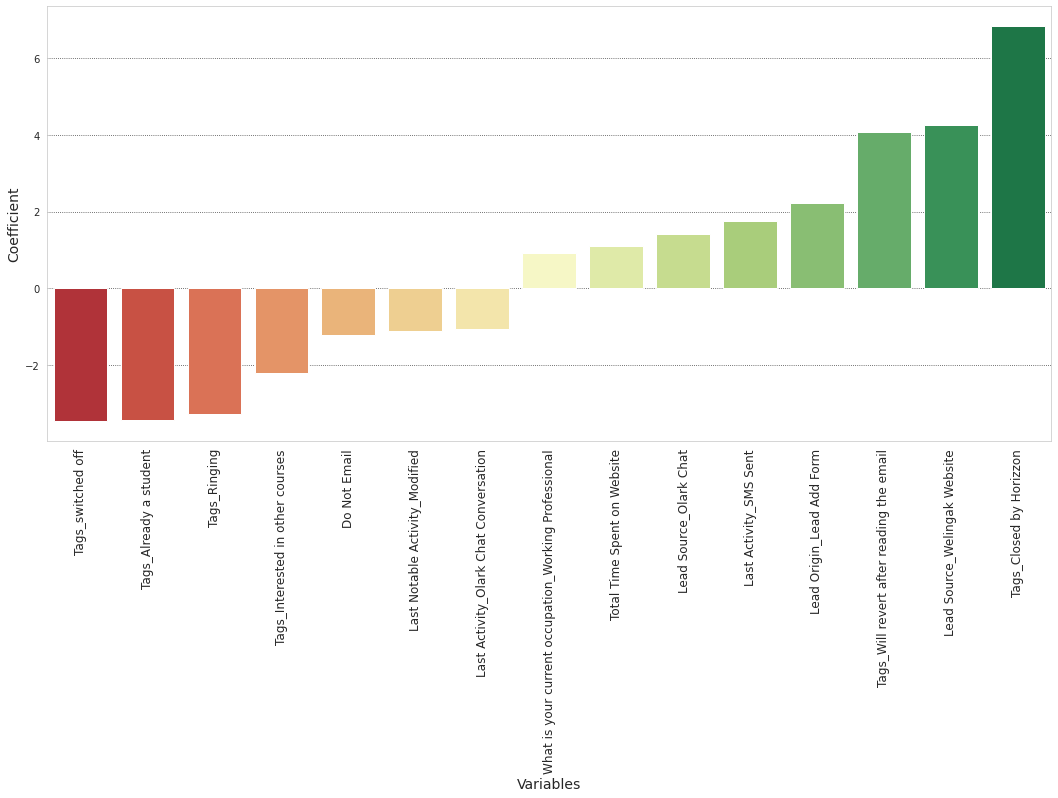

In [287]:
param_df = pd.DataFrame({'Variable': lr_model.feature_names_in_, 'Coefficient': lr_model.coef_.reshape(-1)}).reset_index()
param_df = param_df.sort_values('Coefficient')

plt.figure(figsize = [18,8])
#px.bar(param_df, x = 'Variable', y = 'Coefficient', height = 1000)
sns.barplot(param_df['Variable'], param_df['Coefficient'], palette = 'RdYlGn')
plt.ylabel('Coefficient', fontsize = 14)
plt.xlabel('Variables', fontsize = 14)
plt.xticks(fontsize = 12, rotation = 90)

plt.show()

In [291]:
param_df

,index,Variable,Coefficient
13,13,Tags_switched off,-3.481550
8,8,Tags_Already a student,-3.445004
11,11,Tags_Ringing,-3.292478
10,10,Tags_Interested in other courses,-2.207923
0,0,Do Not Email,-1.221180
14,14,Last Notable Activity_Modified,-1.122570
5,5,Last Activity_Olark Chat Conversation,-1.057872
7,7,What is your current occupation_Working Profes...,0.910865
1,1,Total Time Spent on Website,1.097722
3,3,Lead Source_Olark Chat,1.403107


Most important variables to consider:
* 'Tags_Closed by Horizzon': If this variable is True or 1, then the log-odds go up by 6.84.
* 'Lead Source_Welingak Website': If the Lead source is Welingak website then the log odds increase by 4.26.
* 'Tags_Will revert after reading the email':  If the current status / tag is 'Will revert after reading the email' then the log odds increase by 4.07.
* 'Tags_switched off': If the current status / tag is 'switched off', then the log odds decrease by 3.48.
* 'Tags_Already a student': If the current status / tag is 'Already a student', then the log odds decrease by 3.44.
* 'Tags_Ringing': If the current status / tag is 'Ringing', then the log odds decrease by 3.29.




The higher the magnitude of coefficients, |Coef_|, the greater is it's control on the final decision.
A high value of a variable with high positive coefficient inreases the lead score while a high values of a variable with negative coefficient decreases the lead score.